Polynomial Regression (degree 1) Results:
Mean Squared Error: 27.65026873284228
R-squared: 0.6208258933084712
Mean Absolute Error: 4.1621356133144705

Polynomial Regression (degree 2) Results:
Mean Squared Error: 27.5731444663046
R-squared: 0.6218835150318337
Mean Absolute Error: 4.162105277681349

Polynomial Regression (degree 3) Results:
Mean Squared Error: 27.557831426492648
R-squared: 0.6220935060538932
Mean Absolute Error: 4.158189264569794

Polynomial Regression (degree 4) Results:
Mean Squared Error: 27.53973001552544
R-squared: 0.6223417346118021
Mean Absolute Error: 4.153365686357313

Polynomial Regression (degree 5) Results:
Mean Squared Error: 27.49486509752847
R-squared: 0.6229569769216565
Mean Absolute Error: 4.145625196178296

Polynomial Regression (degree 1) Results:
Mean Squared Error: 28.119822667856806
R-squared: 0.6866472562181065
Mean Absolute Error: 4.131425538454336

Polynomial Regression (degree 2) Results:
Mean Squared Error: 28.038094133624973
R-squared: 0.6875

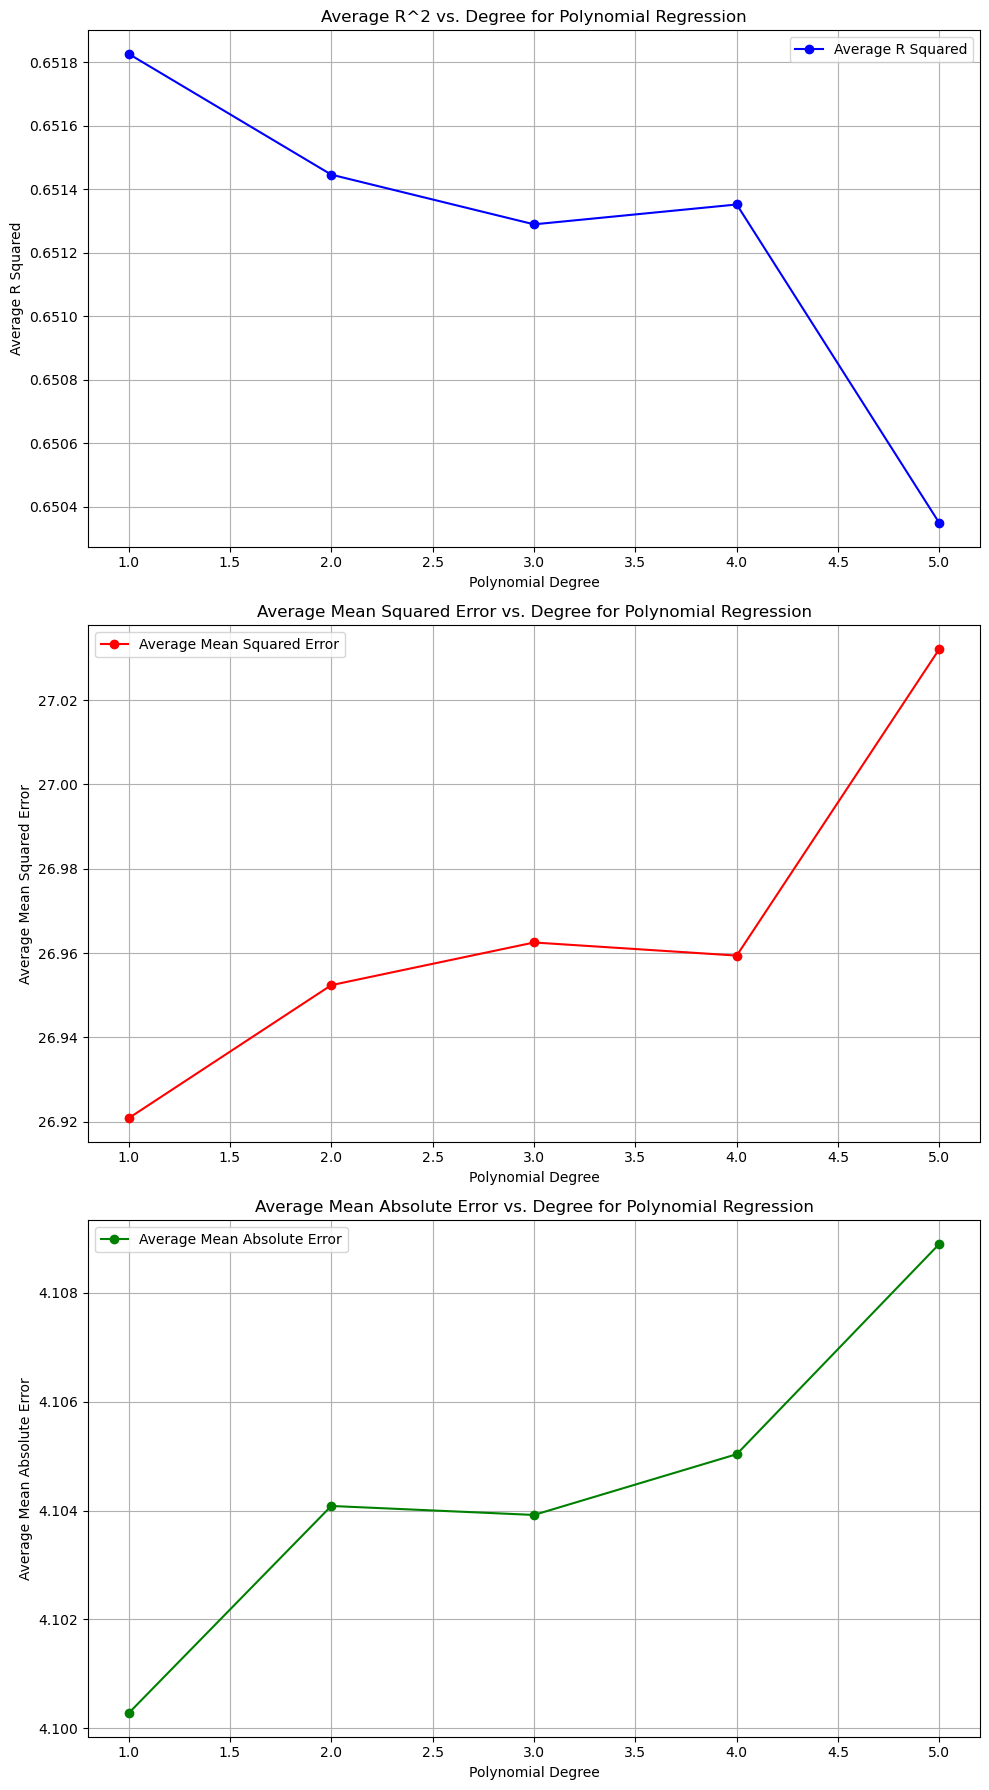

[26.92080557 26.95238284 26.9625041  26.95939619 27.03217554]
Best Model Based on Mean Squared Error: Polynomial Regression (degree 1)
Reason: This model has the lowest mean squared error among all models.

[0.65182588 0.65144542 0.65128894 0.65135143 0.6503478 ]
Best Model Based on  R Squared: Polynomial Regression (degree 1)
Reason: This model has the highest R squared among all models.

[4.10027775 4.10408363 4.10391868 4.10503429 4.10889713]
Best Model Based on Mean Absolute Error: Polynomial Regression (degree 1)
Reason: This model has the lowest mean absolute error among all models.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Function to Evaluate MSE, R-Squares And MAE Metrics of a model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f'{model_name} Results:')
    print('Mean Squared Error:', mse)
    print('R-squared:', r2)
    print('Mean Absolute Error:', mae)
    print()
    
#Function for Train & Evaluate the Model
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, model_name)

# Reading the data from the CSV file in the same folder
data = pd.read_csv('Experience-Salary.csv')
data.head()

# Identifying the independent and dependent attributes
X = data['exp(in months)'].values.reshape(-1, 1)  # Independent attribute - YearsExperience
y = data['salary(in thousands)'].values  # Dependent attribute - Salary

#Testing diffrent Models & Evaluating the Average Metrices
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_degree = None
best_mse = float('inf')
best_r2 = -float('inf')
best_mae = float('inf')

avg_mse_list = []
avg_r2_list = []
avg_mae_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    degrees = [1, 2, 3, 4, 5]

    mse_list = []
    r2_list = []
    mae_list = []

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)
        pr = LinearRegression()
        train_and_evaluate_model(X_poly_train, X_poly_test, y_train, y_test, pr, f'Polynomial Regression (degree {degree})')

        mse_pr = mean_squared_error(y_test, pr.predict(X_poly_test))
        r2_pr = r2_score(y_test, pr.predict(X_poly_test))
        mae_pr = mean_absolute_error(y_test, pr.predict(X_poly_test))

        mse_list.append(mse_pr)
        r2_list.append(r2_pr)
        mae_list.append(mae_pr)

        if mse_pr < best_mse:
            best_mse = mse_pr
            best_model = pr
            best_degree = degree

        if r2_pr > best_r2:
            best_r2 = r2_pr

        if mae_pr < best_mae:
            best_mae = mae_pr

    avg_mse_list.append(mse_list)
    avg_r2_list.append(r2_list)
    avg_mae_list.append(mae_list)

avg_mse_list = np.mean(avg_mse_list, axis=0)
avg_r2_list = np.mean(avg_r2_list, axis=0)
avg_mae_list = np.mean(avg_mae_list, axis=0)

#Visualizing the Avg. Metrices for each Degree to Conclude the best Model

# Plotting R-squared, Mean Squared Error, and Mean Absolute Error on separate subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 18))

# Plotting R-squared
ax1.plot(degrees, avg_r2_list, marker='o', linestyle='-', color='b', label='Average R Squared')
ax1.set_title('Average R^2 vs. Degree for Polynomial Regression')
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Average R Squared')
ax1.grid(True)
ax1.legend()

# Plotting Mean Squared Error
ax2.plot(degrees, avg_mse_list, marker='o', linestyle='-', color='r', label='Average Mean Squared Error')
ax2.set_title('Average Mean Squared Error vs. Degree for Polynomial Regression')
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('Average Mean Squared Error')
ax2.grid(True)
ax2.legend()

# Plotting Mean Absolute Error
ax3.plot(degrees, avg_mae_list, marker='o', linestyle='-', color='g', label='Average Mean Absolute Error')
ax3.set_title('Average Mean Absolute Error vs. Degree for Polynomial Regression')
ax3.set_xlabel('Polynomial Degree')
ax3.set_ylabel('Average Mean Absolute Error')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()


#Final conclusion of the BEST MODEL

# Print the best model and degree for Mean Squared Error
print(avg_mse_list)
print(f'Best Model Based on Mean Squared Error: Polynomial Regression (degree {best_degree})')
print('Reason: This model has the lowest mean squared error among all models.')
print()

# Print the best model and degree for R-squared
print(avg_r2_list)
print(f'Best Model Based on \b R Squared\b: Polynomial Regression (degree {best_degree})')
print('Reason: This model has the highest R squared among all models.')
print()

# Print the best model and degree for Mean Absolute Error
print(avg_mae_list)
print(f'Best Model Based on Mean Absolute Error: Polynomial Regression (degree {best_degree})')
print('Reason: This model has the lowest mean absolute error among all models.')
